## Evaluate results

### Subtask:
Visualize the clusters and analyze the log-likelihood over iterations.

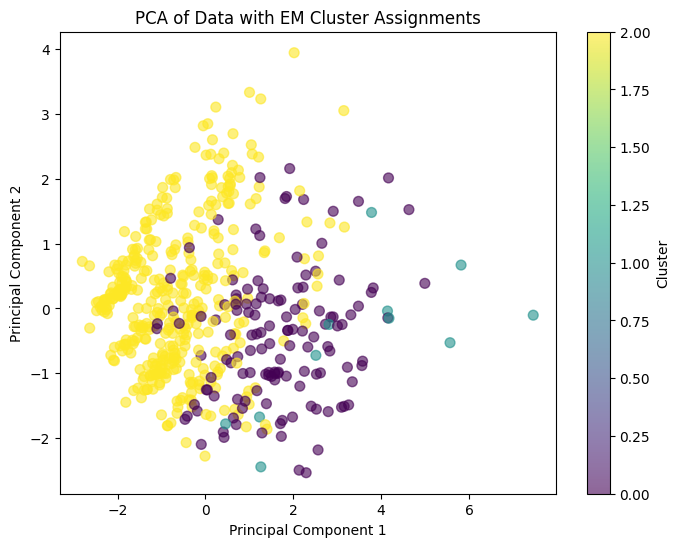

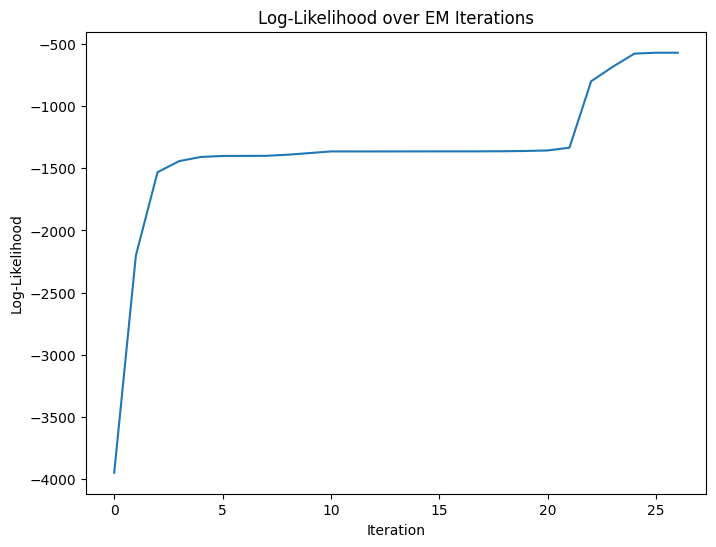

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assign each data point to a cluster based on the final responsibilities
cluster_assignments = np.argmax(responsibilities, axis=1)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_assignments, cmap='viridis', s=50, alpha=0.6)
plt.title('PCA of Data with EM Cluster Assignments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Plot the log-likelihood over iterations
plt.figure(figsize=(8, 6))
plt.plot(log_likelihoods)
plt.title('Log-Likelihood over EM Iterations')
plt.xlabel('Iteration')
plt.ylabel('Log-Likelihood')
plt.show()

## Iterate

### Subtask:
Repeat the E-step and M-step until convergence (i.e., the parameters no longer change significantly).

In [7]:
# Iterate E-step and M-step until convergence

max_iterations = 100
tolerance = 1e-4
log_likelihoods = []

for iteration in range(max_iterations):
    # E-step: Calculate responsibilities
    responsibilities = np.zeros((n_samples, n_components))
    for i in range(n_components):
        responsibilities[:, i] = initial_weights[i] * multivariate_normal.pdf(df_scaled, mean=initial_means[i], cov=initial_covariances[i], allow_singular=True)

    responsibilities_sum = responsibilities.sum(axis=1)[:, np.newaxis]
    responsibilities = responsibilities / responsibilities_sum

    # M-step: Update parameters
    new_weights = responsibilities.sum(axis=0) / n_samples
    new_means = np.dot(responsibilities.T, df_scaled) / responsibilities.sum(axis=0)[:, np.newaxis]
    new_covariances = []
    for i in range(n_components):
        diff = df_scaled - new_means[i]
        cov = np.dot((responsibilities[:, i] * diff.T), diff) / responsibilities.sum(axis=0)[i] + np.eye(df_scaled.shape[1]) * 1e-6
        new_covariances.append(cov)

    # Calculate log-likelihood for convergence check
    log_likelihood = 0
    for i in range(n_components):
        log_likelihood += np.sum(responsibilities[:, i] * (np.log(initial_weights[i] + 1e-6) + multivariate_normal.logpdf(df_scaled, mean=initial_means[i], cov=initial_covariances[i], allow_singular=True)))
    log_likelihoods.append(log_likelihood)

    # Check for convergence
    if iteration > 0 and abs(log_likelihoods[-1] - log_likelihoods[-2]) < tolerance:
        print(f"Converged at iteration {iteration}")
        break

    # Update parameters for the next iteration
    initial_weights = new_weights
    initial_means = new_means
    initial_covariances = new_covariances

print("\nFinal Weights:")
display(initial_weights)
print("\nFinal Means:")
display(initial_means)
print("\nFinal Covariances (for one component):")
display(initial_covariances[0])

Converged at iteration 26

Final Weights:


array([0.2440367 , 0.02018349, 0.73577982])


Final Means:


array([[ 0.77190531,  0.25320446,  0.56730232,  1.42181174,  0.56274446,
         0.23368965],
       [ 1.5877142 ,  0.79976233,  1.15684823,  3.59490072,  0.53908457,
         0.67280735],
       [-0.29957173, -0.10591915, -0.21989162, -0.57018671, -0.20143377,
        -0.0959641 ]])


Final Covariances (for one component):


array([[ 1.04388359e+00,  4.74764059e-01,  9.00254675e-02,
         1.77938552e-31,  4.50551852e-01,  3.21754488e-01],
       [ 4.74764059e-01,  7.80368666e-01,  7.69634047e-02,
        -1.18625701e-32,  2.23089848e-01,  2.09555724e-01],
       [ 9.00254675e-02,  7.69634047e-02,  8.49640703e-01,
         2.44665508e-31,  2.40604442e-02, -7.48136807e-03],
       [ 2.13526262e-31,  0.00000000e+00,  2.50596794e-31,
         1.00000000e-06,  8.89692758e-32,  9.11935077e-32],
       [ 4.50551852e-01,  2.23089848e-01,  2.40604442e-02,
         7.71067057e-32,  1.39697289e+00,  1.06084883e-03],
       [ 3.21754488e-01,  2.09555724e-01, -7.48136807e-03,
         8.37794014e-32,  1.06084883e-03,  9.99773507e-01]])

## M-step

### Subtask:
Implement the maximization step, where you update the model parameters based on the probabilities calculated in the E-step.

In [6]:
# M-step: Update parameters
new_weights = responsibilities.sum(axis=0) / n_samples
new_means = np.dot(responsibilities.T, df_scaled) / responsibilities.sum(axis=0)[:, np.newaxis]
new_covariances = []
for i in range(n_components):
    diff = df_scaled - new_means[i]
    # Add a small value (e.g., 1e-6) to covariance diagonal for numerical stability
    cov = np.dot((responsibilities[:, i] * diff.T), diff) / responsibilities.sum(axis=0)[i] + np.eye(df_scaled.shape[1]) * 1e-6
    new_covariances.append(cov)

# Update initial parameters for the next iteration
initial_weights = new_weights
initial_means = new_means
initial_covariances = new_covariances

print("Updated Weights:")
display(initial_weights)
print("\nUpdated Means:")
display(initial_means)
print("\nUpdated Covariances (for one component):")
display(initial_covariances[0])

Updated Weights:


array([0.27824353, 0.20404587, 0.5177106 ])


Updated Means:


array([[ 0.15952045,  0.19608419,  0.81871115,  0.40173689,  0.04938564,
         0.4982634 ],
       [ 1.11570663,  0.5800892 ,  0.36107924,  0.74900245,  1.12474244,
         0.09022254],
       [-0.52546898, -0.33401665, -0.58232882, -0.51111865, -0.46983833,
        -0.30335114]])


Updated Covariances (for one component):


array([[ 0.75647498,  0.35234054,  0.03675413,  0.27165151,  0.00350865,
         0.25309178],
       [ 0.35234054,  1.1385456 , -0.13908686, -0.08561094, -0.14261936,
         0.39088211],
       [ 0.03675413, -0.13908686,  0.84933444,  0.15590328,  0.18919276,
        -0.27194859],
       [ 0.27165151, -0.08561094,  0.15590328,  1.26869121,  0.00164591,
        -0.08373544],
       [ 0.00350865, -0.14261936,  0.18919276,  0.00164591,  0.56737907,
        -0.0893265 ],
       [ 0.25309178,  0.39088211, -0.27194859, -0.08373544, -0.0893265 ,
         1.22139246]])

## E-step

### Subtask:
Implement the expectation step, where you calculate the probability of each data point belonging to each component of the model.

In [5]:
from scipy.stats import multivariate_normal

# E-step: Calculate responsibilities
n_samples = df_scaled.shape[0]
responsibilities = np.zeros((n_samples, n_components))

for i in range(n_components):
    # Calculate the probability density for each data point under the current component
    # Add a small value (e.g., 1e-6) to covariance diagonal for numerical stability
    # cov = initial_covariances[i] + np.eye(df_scaled.shape[1]) * 1e-6
    # responsibilities[:, i] = initial_weights[i] * multivariate_normal.pdf(df_scaled, mean=initial_means[i], cov=cov)

    # Using the full covariance matrix for now as initialized
    responsibilities[:, i] = initial_weights[i] * multivariate_normal.pdf(df_scaled, mean=initial_means[i], cov=initial_covariances[i])


# Normalize responsibilities
responsibilities_sum = responsibilities.sum(axis=1)[:, np.newaxis]
responsibilities = responsibilities / responsibilities_sum

print("Responsibilities (first 5 data points):")
display(responsibilities[:5])

Responsibilities (first 5 data points):


array([[2.25332789e-02, 9.77466514e-01, 2.07252023e-07],
       [4.03312358e-02, 9.59668764e-01, 5.48904808e-12],
       [2.13886432e-02, 9.78599370e-01, 1.19865569e-05],
       [4.26872675e-01, 5.73123161e-01, 4.16388192e-06],
       [2.61587191e-01, 7.37830670e-01, 5.82138735e-04]])

## Initialize parameters

### Subtask:
Initialize the parameters of the model (e.g., means, covariances, and mixing coefficients for a Gaussian Mixture Model).

In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Select only numerical columns for EM
numerical_cols = df.select_dtypes(include=np.number).columns
df_numerical = df[numerical_cols].copy()

# Handle missing values (if any) - using mean imputation as an example
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df_numerical)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Convert back to DataFrame for easier handling
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)

# Define the number of components (clusters)
n_components = 3 # You can change this number

# Initialize parameters for a Gaussian Mixture Model
# Initialize means randomly from the data
np.random.seed(42) # for reproducibility
initial_means_indices = np.random.choice(df_scaled.shape[0], n_components, replace=False)
initial_means = df_scaled.iloc[initial_means_indices].values

# Initialize covariances as identity matrices
initial_covariances = [np.eye(df_scaled.shape[1])] * n_components

# Initialize mixing coefficients uniformly
initial_weights = np.ones(n_components) / n_components

print("Initial Means:")
display(initial_means)
print("\nInitial Covariances (for one component):")
display(initial_covariances[0])
print("\nInitial Weights:")
display(initial_weights)

Initial Means:


array([[-0.37818837,  0.34566751,  1.40341936,  1.42181174,  0.22441013,
         0.35597563],
       [ 1.00778496,  0.62240124,  0.04727831,  1.42181174,  1.37821692,
        -0.80574124],
       [-0.56548207, -0.51220705, -1.30886273, -0.57018671, -0.92939666,
        -0.80574124]])


Initial Covariances (for one component):


array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])


Initial Weights:


array([0.33333333, 0.33333333, 0.33333333])

# Task
Perform expectation minimization algorithm on the data.

## Load the data

### Subtask:
Load the data that you want to apply the EM algorithm to.


**Reasoning**:
Load the data from the CSV file into a pandas DataFrame and display the first few rows to verify the data loading.



In [3]:
import pandas as pd

try:
    df = pd.read_csv('/content/Housing.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: The file '/content/Housing.csv' was not found and cannot proceed with the task.")
    df = None

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Load the data

### Subtask:
Load the data that you want to apply the EM algorithm to.


**Reasoning**:
Load the data from the file 'data.csv' into a pandas DataFrame and display the first 5 rows. Handle the FileNotFoundError by printing a message.



In [2]:
import pandas as pd

try:
    df = pd.read_csv('data.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: The file 'data.csv' was not found and cannot proceed with the task.")
    df = None


Error: The file 'data.csv' was not found and cannot proceed with the task.
